In [66]:
import pandas as pd
import os
import glob

folder_path = "data"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Remove channel-level summary file
csv_files = [f for f in csv_files if "channels_summary" not in f.lower()]

df_list = []
for f in csv_files:
    print("Loading:", f)
    df_list.append(pd.read_csv(f))

df = pd.concat(df_list, ignore_index=True)

df = df.fillna("")

# Genre dictionary

genres = {
    "Rescue/Adoption": ["rescue", "adopted", "stray", "shelter", "feral"],
    "Funny/Comedy": ["funny", "hilarious", "compilation", "fails", "zoomies", "weird", "chaos", "silly", "goofy"],
    "Talking Cats": ["talking", "meow", "conversation", "voice", "chatty"],
    "Travel/Adventure": ["travel", "outdoor", "adventure", "hiking", "car"],
    "Daily Life/Vlog": ["morning", "routine", "day", "vlog", "daily", "cleaning"],
    "Food/Treats": ["eating", "food", "treats", "dinner", "feeding"],
}

# Assign genres
def assign_genres(row):
    text = " ".join([
        str(row["title"]),
        str(row["description"]),
        str(row["tags"]),
        str(row["hashtags"]),
    ]).lower()

    matched = [g for g, words in genres.items() if any(w in text for w in words)]
    return ", ".join(matched) if matched else "Uncategorized"

df["genres"] = df.apply(assign_genres, axis=1)

# Save output
output_path = os.path.join(folder_path, "videos_with_genres.csv")
df.to_csv(output_path, index=False)
print("Saved:", output_path)


Loading: data\CaD_Animals.csv
Loading: data\catmp4.csv
Loading: data\CatPusic_Team.csv
Loading: data\cats101.csv
Loading: data\CAT_MAN_CHRIS.csv
Loading: data\Chef_Cat_ChangAn.csv
Loading: data\Chip_The_Manx.csv
Loading: data\Cole_and_Marmalade.csv
Loading: data\Crunchycat.csv
Loading: data\DailyDoseOfInternetCats.csv
Loading: data\Dexter_The_Cat.csv
Loading: data\el_Cato.csv
Loading: data\Feeding_Street_Cats.csv
Loading: data\funcatflicks.csv
Loading: data\FunnyPaws.csv
Loading: data\Funny_And_Cute_Cats_Life.csv
Loading: data\Little_Love.csv
Loading: data\Maine_Coon_Kittens.csv
Loading: data\Meowphorius.csv
Loading: data\OwlKitty.csv
Loading: data\Pawsome_Cats_of_the_Internet.csv
Loading: data\Princess_Nika_cat.csv
Loading: data\Purrfect_Pets.csv
Loading: data\Renus_Delph.csv
Loading: data\TakeYourDoseOfCats.csv
Loading: data\Tasty_Paws.csv
Loading: data\The_Meow_Show.csv
Loading: data\Walter_the_Catt.csv
Saved: data\videos_with_genres.csv


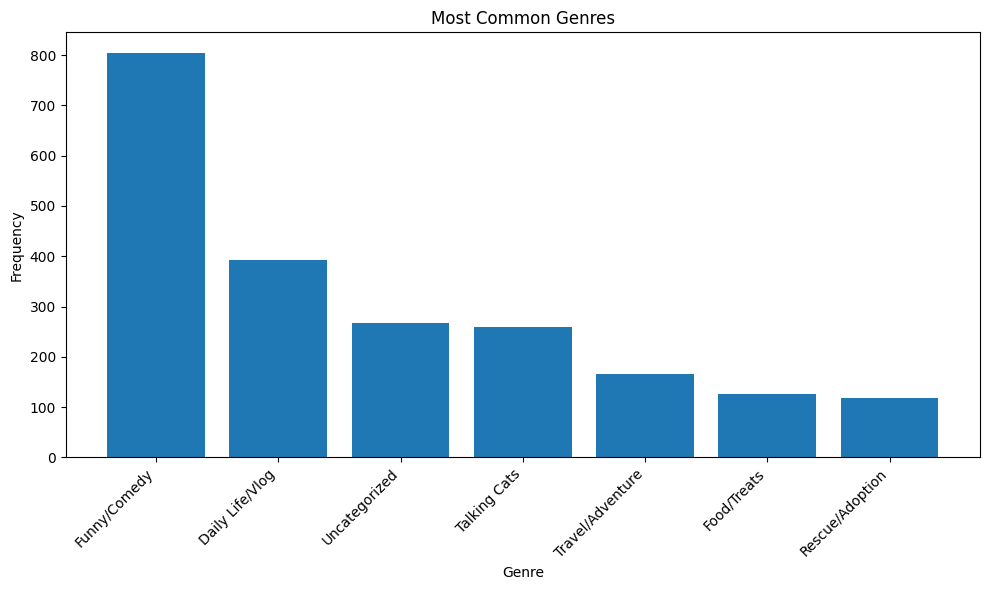

In [67]:
import matplotlib.pyplot as plt


if "genres" not in df.columns:
    raise ValueError("No genres found")


# Split multi-genre rows

all_genres = []

for entry in df["genres"]:
    if isinstance(entry, str):
        for g in entry.split(","):
            g = g.strip()
            if g:
                all_genres.append(g)

# Count genre frequency

from collections import Counter
genre_counts = Counter(all_genres)

# Get top N genres

top_n = 7
top_genres = genre_counts.most_common(top_n)

labels = [g for g, _ in top_genres]
counts = [c for _, c in top_genres]

# Plot

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


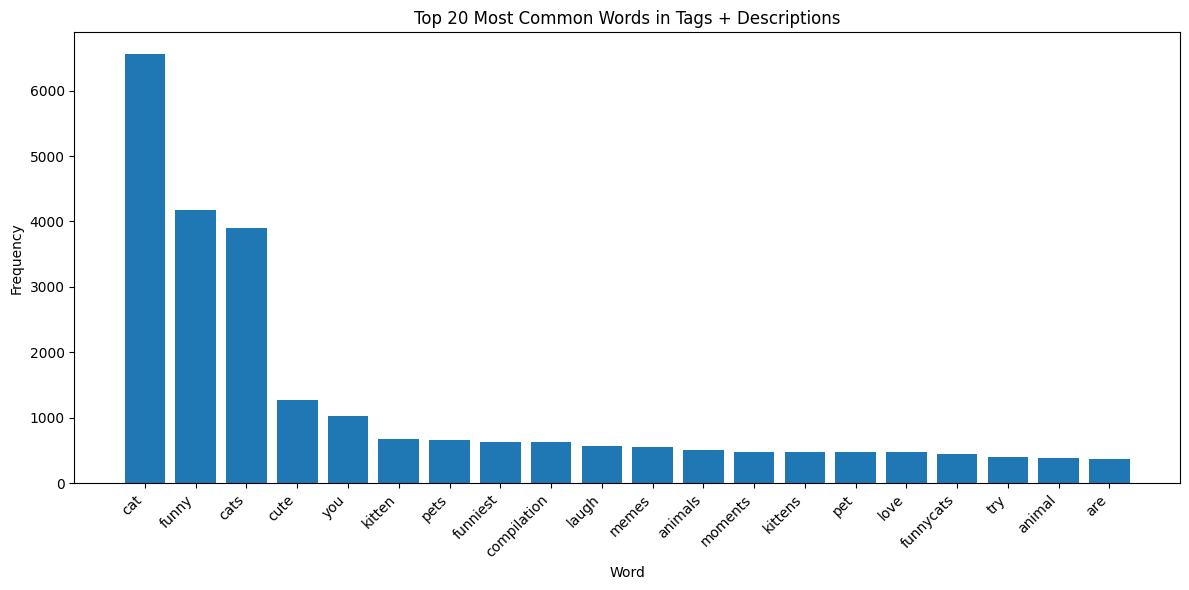

In [ ]:
import matplotlib.pyplot as plt
import re
from collections import Counter



# Combine tags + description text

df_clean = df.fillna("")
text_data = df_clean["tags"].astype(str) + " " + df_clean["description"].astype(str)


# Clean text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

cleaned = text_data.apply(clean_text)

# Count words

all_words = " ".join(cleaned).split()

stopwords = {
    "the","and","a","to","in","of","for","is","on","with","my",
    "at","this","that","it","me","our","your","we","as","from", "www", "https", "youtube", "com", "s", "video", "not", "videos", "t",
}

filtered_words = [w for w in all_words if w not in stopwords]
word_counts = Counter(filtered_words)

# Get top 20

top_words = word_counts.most_common(20)
words = [w for w, _ in top_words]
counts = [c for _, c in top_words]


# Plot

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Common Words in Tags + Descriptions")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [69]:
from collections import Counter
import re

def most_common_tags(genre_name, top_n=10):
    # Filter by genre
    subset = df[df["genres"].str.contains(genre_name, na=False)]
    
    # Combine all tags
    all_tags = subset["tags"].astype(str).str.lower().str.cat(sep=" ")
    
    # Split and clean
    words = re.findall(r'\w+', all_tags)
    
    counter = Counter(words)
    return counter.most_common(top_n)


print("Top tags in Rescue/Adoption:", most_common_tags("Rescue/Adoption"))
print("Top tags in Funny/Comedy:", most_common_tags("Funny/Comedy"))
print("Top tags in Talking Cats:", most_common_tags("Talking Cats"))
print("Top tags in Travel/Adventure:", most_common_tags("Travel/Adventure"))
print("Top tags in Daily Life/Vlog:", most_common_tags("Daily Life/Vlog"))
print("Top tags in Food/Treats:", most_common_tags("Food/Treats"))

Top tags in Rescue/Adoption: [('cat', 700), ('kitten', 205), ('stray', 187), ('kittens', 183), ('rescue', 180), ('cute', 143), ('cats', 142), ('feeding', 84), ('paws', 74), ('adorable', 73)]
Top tags in Funny/Comedy: [('cat', 3353), ('funny', 2762), ('cats', 2086), ('videos', 1541), ('cute', 719), ('memes', 469), ('video', 460), ('compilation', 396), ('pets', 385), ('pet', 372)]
Top tags in Talking Cats: [('cat', 1676), ('funny', 726), ('cats', 524), ('videos', 498), ('cute', 420), ('kitten', 276), ('kittens', 220), ('stray', 180), ('dog', 176), ('memes', 176)]
Top tags in Travel/Adventure: [('cat', 303), ('cats', 153), ('funny', 118), ('cute', 58), ('videos', 52), ('video', 43), ('kitten', 42), ('kittens', 39), ('and', 34), ('of', 28)]
Top tags in Daily Life/Vlog: [('cat', 1785), ('funny', 1202), ('cats', 1101), ('videos', 594), ('cute', 410), ('and', 294), ('video', 257), ('animals', 219), ('funniest', 194), ('animal', 192)]
Top tags in Food/Treats: [('cat', 749), ('stray', 180), ('c

                                                  title  \
1150                                    This bothers me   
600   Cesar the cat wanted to enjoy his outing after...   
316   I Confronted My Cat’s Online Haters & This Is ...   
210   7 Year Old Siamese Cat Saved from Suffering on...   
331   Why Chip keeps getting reported (He doesn’t de...   
602   The stray cat guards my car every day in excha...   
226               Cat Man Chris "Fighting For Felines!"   
627   A blind cat that was abandoned, we will rescue...   
204                               Pumpkin Spice Kitten!   
355   12 Year Old Senior Ginger Cat Still Plays Like...   

                                                 genres  view_count  \
1150                                      Uncategorized       12692   
600          Rescue/Adoption, Talking Cats, Food/Treats        1008   
316                                     Rescue/Adoption         612   
210                       Rescue/Adoption, Talking Cats       1443

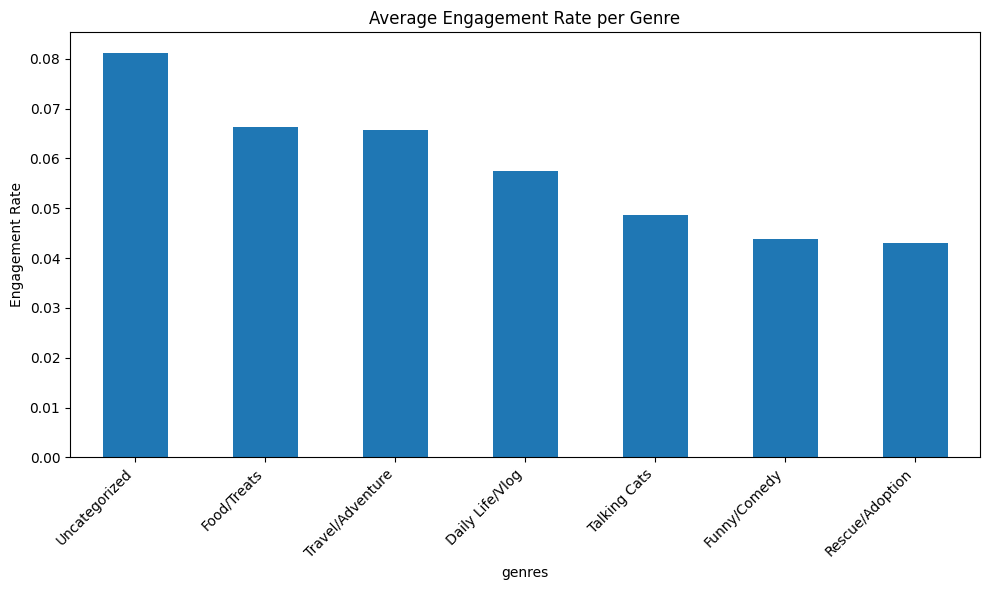

In [70]:
import pandas as pd

# Ensure numeric
for col in ["view_count", "like_count", "comment_count"]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Compute engagement rate
df["engagement_rate"] = (df["like_count"] + df["comment_count"]) / df["view_count"]
df["engagement_rate"] = df["engagement_rate"].fillna(0)

# Top 10 videos by engagement
top_engagement = df.sort_values("engagement_rate", ascending=False)[
    ["title", "genres", "view_count", "like_count", "comment_count", "engagement_rate"]
].head(10)
print(top_engagement)

# Average engagement per genre (handles multi-genres)
df_exploded = df.copy()
df_exploded["genres"] = df_exploded["genres"].str.split(",").explode("genres").str.strip()
avg_engagement_per_genre = df_exploded.groupby("genres")["engagement_rate"].mean().sort_values(ascending=False)
print(avg_engagement_per_genre)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_engagement_per_genre.plot(kind="bar")
plt.title("Average Engagement Rate per Genre")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
